In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nums = np.random.uniform(0,1, 100)

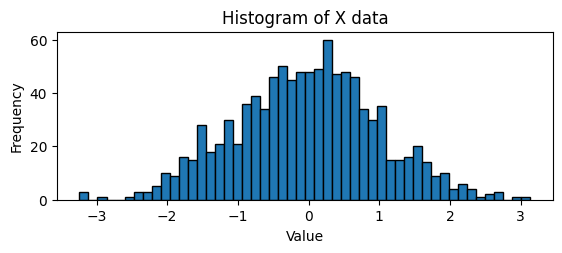

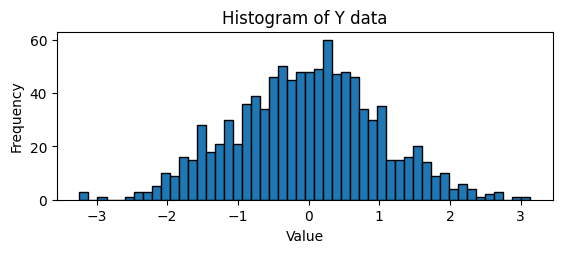

In [3]:
def box_muller(N):
    u = np.random.uniform(low=0, high=1, size=N)
    v = np.random.uniform(low=0, high=1, size=N)

    x = np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
    y = np.sqrt(-2*np.log(u))*np.sin(2*np.pi*v)

    return x, y

x, y = box_muller(N=1000)

plt.figure()
plt.subplot(211)
plt.hist(x, bins=50, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of X data')
plt.show()

plt.subplot(212)
plt.hist(x, bins=50, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Y data')
plt.show()


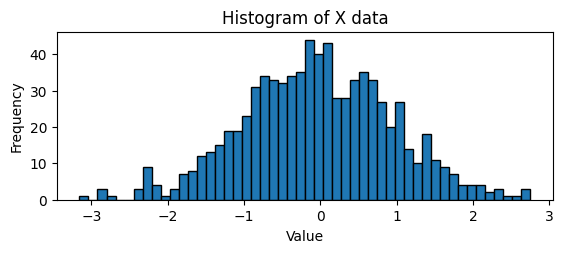

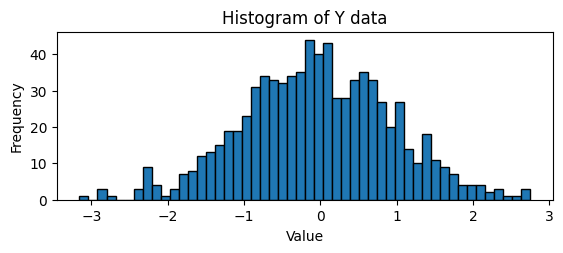

In [4]:
def marsaglia(N):
    u = np.random.uniform(low=-1, high=1, size=N)
    v = np.random.uniform(low=-1, high=1, size=N)

    criterion = (u**2 + v**2) <= 1

    u = u[criterion]
    v = v[criterion]

    x = np.sqrt((-2*np.log(u**2 + v**2))/(u**2 + v**2))*u
    y = np.sqrt((-2*np.log(u**2 + v**2))/(u**2 + v**2))*v

    return x, y

x, y = marsaglia(N=1000)

plt.figure()
plt.subplot(211)
plt.hist(x, bins=50, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of X data')
plt.show()

plt.subplot(212)
plt.hist(x, bins=50, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Y data')
plt.show()


In [5]:
np.random.randint(1, 11)

6

In [6]:
# Sampling of permutations

# Algorithm 3.2: Sampling permutations without consideration of the order.
def choose_n_of_N(n, N):
    k = n
    S = np.arange(1,n+1)

    while k <= N:
        u = np.random.uniform(low=0, high=1, size=1)
        if u < n/k:
            i = np.random.randint(0,n)
            S[i] = k
        k += 1

    return S


choose_n_of_N(5, 10)

array([1, 6, 9, 7, 8])

In [7]:
# Algorithm 3.3: Sampling permutations with consideration of the order.
def algorithm33(n, N):
    u = np.random.uniform(low=0, high=1, size=N)
    r = np.argsort(u)[::-1] + 1

    return r[:n]

algorithm33(5, 10)

array([ 1,  9,  6, 10,  3])

In [8]:
# Algorithm 3.4: Sampling permutations with consideration of the order
def algorithm34(n, N):
    M = np.arange(1, N+1)

    for k in range(1, n+1):
        i = np.random.randint(k, N)
        M[i], M[k] = M[k], M[i]

    return M[:n]

algorithm34(5, 10)


array([1, 7, 8, 4, 3])

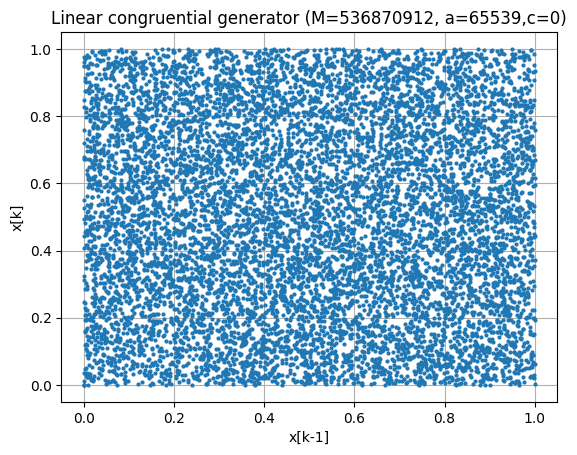

In [30]:
# Linear congruential generator
N = 10000
a = 2**16+3 #125
c = 0 #1
M = 2**29 #256

def generate_lcg(N, a, c, M, x0 = 0):
    x = np.zeros(N)
    x[0] = x0 / M

    for i in range(1, N):
        x[i] = (a*x[i-1] + c) % M

    return x/M

x = generate_lcg(N, a=a, c=c, M=M, x0=1)

plt.figure()
plt.plot(x[:-1], x[1:], 'o', markersize=2)
plt.xlabel('x[k-1]')
plt.ylabel('x[k]')
plt.title(f'Linear congruential generator (M={M}, a={a},c={c})')
plt.grid(True)
plt.show()
